# Heart Diesease Prediction

Here we are going to predict wether the person is having Heart Diesease or not.

Problem Type : Classification (Supervised Learning)

The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.



##### Dataset is taken from Kaggle.com , Dataset : Heart Disease UCI

Attribute Information:
> 1. age
> 2. sex
> 3. chest pain type (4 values)
> 4. resting blood pressure
> 5. serum cholestoral in mg/dl
> 6. fasting blood sugar > 120 mg/dl
> 7. resting electrocardiographic results (values 0,1,2)
> 8. maximum heart rate achieved
> 9. exercise induced angina
> 10. oldpeak = ST depression induced by exercise relative to rest
> 11. the slope of the peak exercise ST segment
> 12. number of major vessels (0-3) colored by flourosopy
> 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

Columns
1. ageage in years
2. sex(1 = male; 0 = female)
3. cpchest pain type
4. trestbpsresting blood pressure (in mm Hg on admission to the hospital)
5. cholserum cholestoral in mg/dl
6. fbs(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecgresting electrocardiographic results
8. thalachmaximum heart rate achieved
9. exangexercise induced angina (1 = yes; 0 = no)
10. oldpeakST depression induced by exercise relative to rest
11. slopethe slope of the peak exercise ST segment
12. canumber of major vessels (0-3) colored by flourosopy
13. thal3 = normal; 6 = fixed defect; 7 = reversable defect
14. target1 or 0

In [17]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [18]:
df=pd.read_csv("heart.csv")

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
print(df.shape)
print(df.columns)

(303, 14)
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [21]:
df.columns=['Age', 'Gender', 'ChestPainType', 'BloodPressure', 'Cholesterol', 'FBloodSuger', 'CardioResult', 'HeartRate', 'Angina', 'OldPeak', 'Slope', 'NoOfVessels','Thal', 'Target']

In [57]:
df.columns

Index(['Age', 'Gender', 'ChestPainType', 'BloodPressure', 'Cholesterol',
       'FBloodSuger', 'CardioResult', 'HeartRate', 'Angina', 'OldPeak',
       'Slope', 'NoOfVessels', 'Thal', 'Target'],
      dtype='object')

In [ ]:
# categorical features, : Gender, ChestPainType, FBloodSuger, CardioResult,  Angina, slope, NoOfVessels, Thal

In [22]:
df.Target.value_counts()

1    165
0    138
Name: Target, dtype: int64

1    207
0     96
Name: Gender, dtype: int64


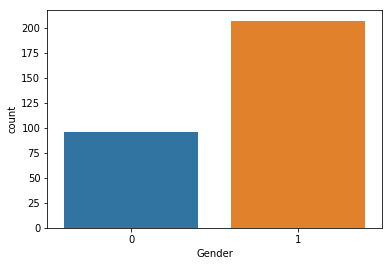

In [23]:

print(df.Gender.value_counts())
sns.countplot(x='Gender', data=df)
plt.show()

In [24]:
a=df.columns

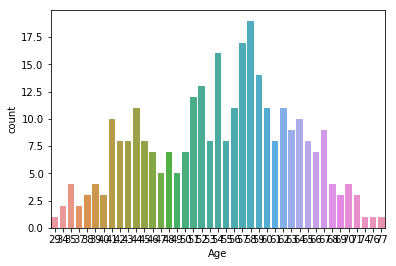

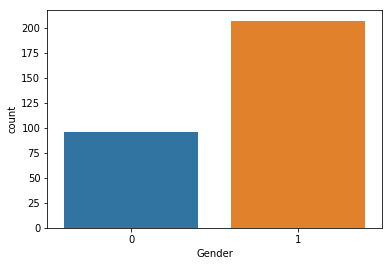

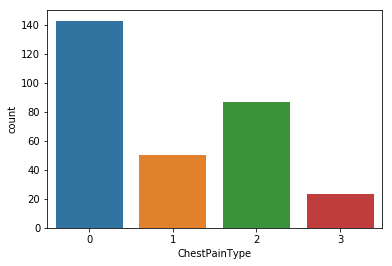

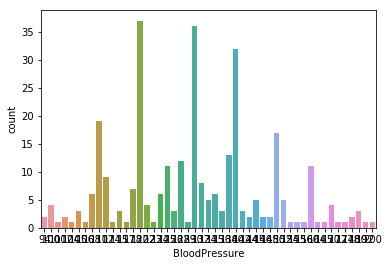

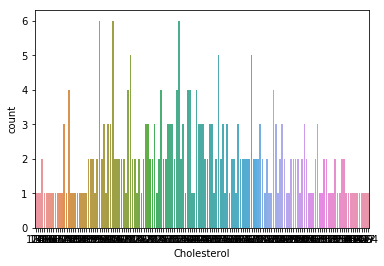

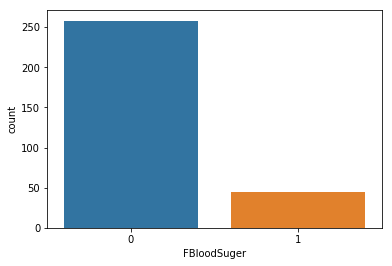

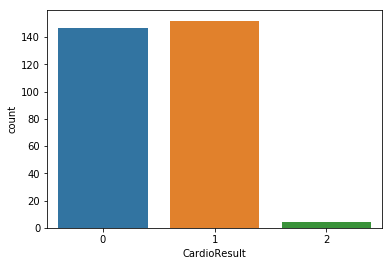

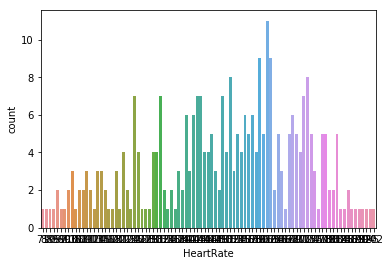

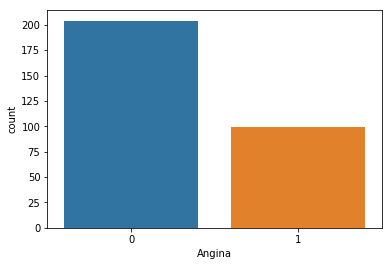

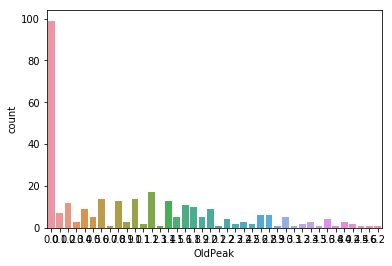

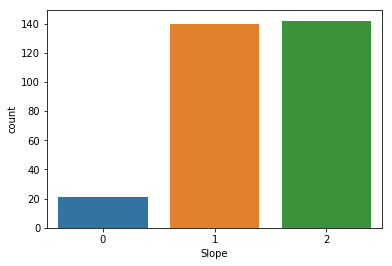

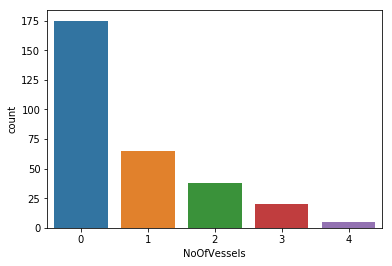

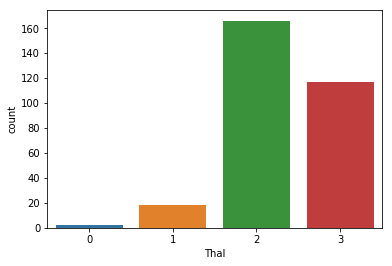

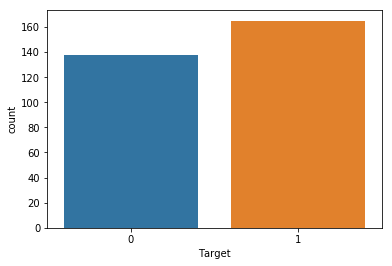

In [25]:
type(a)
for t in a:
    sns.countplot(x=t, data=df)
    plt.show()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
Age              303 non-null int64
Gender           303 non-null int64
ChestPainType    303 non-null int64
BloodPressure    303 non-null int64
Cholesterol      303 non-null int64
FBloodSuger      303 non-null int64
CardioResult     303 non-null int64
HeartRate        303 non-null int64
Angina           303 non-null int64
OldPeak          303 non-null float64
Slope            303 non-null int64
NoOfVessels      303 non-null int64
Thal             303 non-null int64
Target           303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [27]:
df.dtypes

Age                int64
Gender             int64
ChestPainType      int64
BloodPressure      int64
Cholesterol        int64
FBloodSuger        int64
CardioResult       int64
HeartRate          int64
Angina             int64
OldPeak          float64
Slope              int64
NoOfVessels        int64
Thal               int64
Target             int64
dtype: object

In [28]:
# Divided data x= Features,y= Classes
x=df.drop(['Target'], axis=1)
print(x.shape)
y=df['Target']
#print(type(x))
print(y.shape)

(303, 13)
(303,)


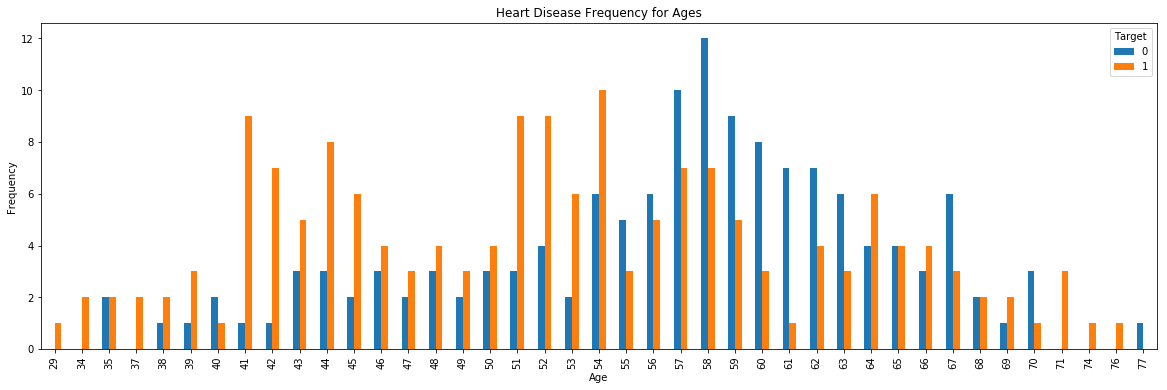

In [29]:
pd.crosstab(df.Age,df.Target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [30]:
# to check whether any column is having null values
df.isnull().sum()

Age              0
Gender           0
ChestPainType    0
BloodPressure    0
Cholesterol      0
FBloodSuger      0
CardioResult     0
HeartRate        0
Angina           0
OldPeak          0
Slope            0
NoOfVessels      0
Thal             0
Target           0
dtype: int64

C:\Users\Shailendra\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


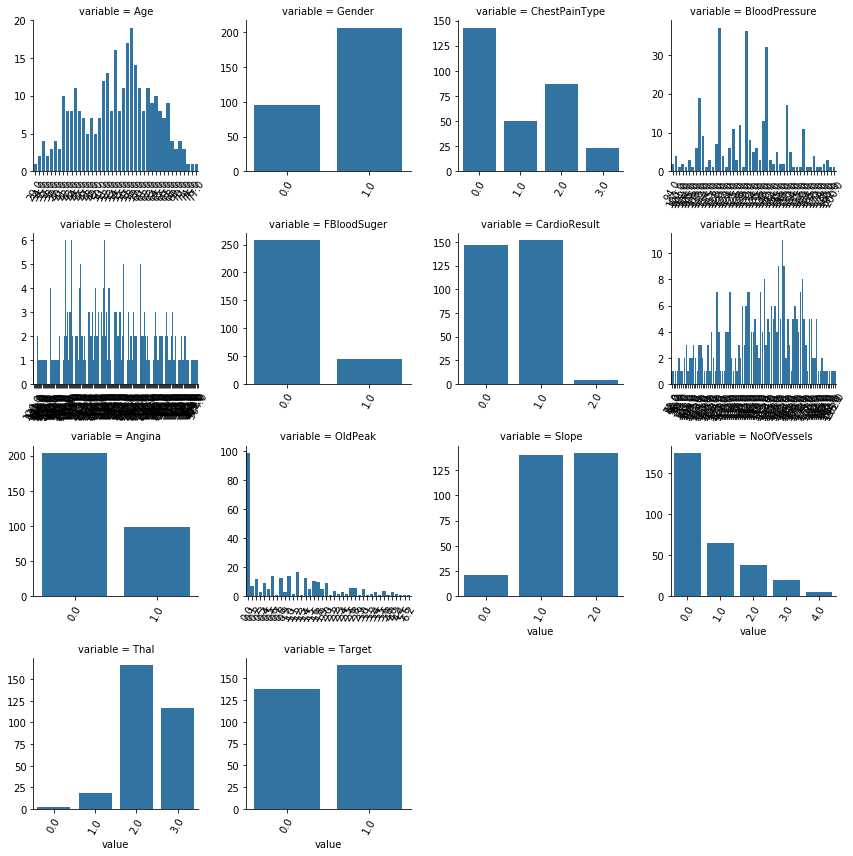

In [31]:
#Graphical representation of features/variables
f=pd.melt(df, value_vars= df)
g=sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g=g.map(sns.countplot, 'value')
[plt.setp(ax.get_xticklabels(),rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

In [36]:
# draw a scatterplot to show relationship between dependent(Response/Target) and independent variable (Features)
#sns.pairplot(df, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales',size=7, aspect=0.7, kind='kreg')

# Feature Selection

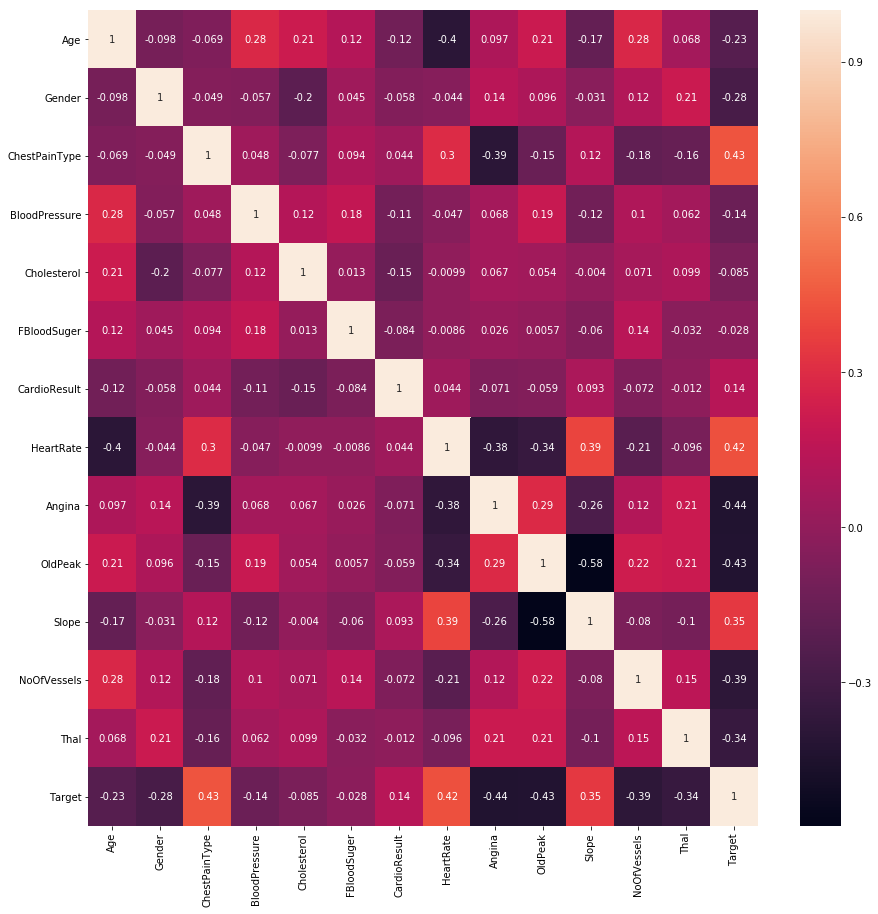

In [37]:
# correlation between variables
#lighter shade strong relation , dark shade - Negative  relation
corr=df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000250EB02DE80>,
      dtype=object)

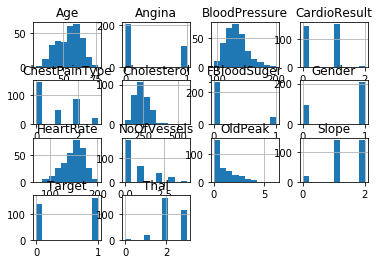

In [67]:
df.hist()

In [66]:
# categorical features, :  ChestPainType, , slope, FBloodSuger, CardioResult,  
#Angina, NoOfVessels, Thal  ,Gender - negatively corelated
df[['FBloodSuger', 'CardioResult', 'ChestPainType', 'Slope']].head()

,FBloodSuger,CardioResult,ChestPainType,Slope
0,1,0,3,0
1,0,1,2,0
2,0,0,1,2
3,0,1,1,2
4,0,1,0,2


In [61]:
# ChestPainType , HeartRate, Slope, CardioResult
pd.crosstab(df.Target,df.ChestPainType, margins=True)

ChestPainType,0,1,2,3,All
Target,,,,,
0,104,9,18,7,138
1,39,41,69,16,165
All,143,50,87,23,303


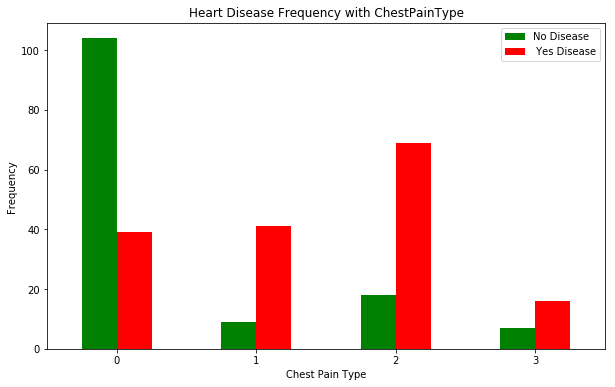

In [39]:
pd.crosstab(df.ChestPainType,df.Target).plot(kind="bar",figsize=(10,6),color=['green','red' ])
plt.title('Heart Disease Frequency with ChestPainType')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation=0)
plt.legend(["No Disease", " Yes Disease"])
plt.ylabel('Frequency')
plt.show()

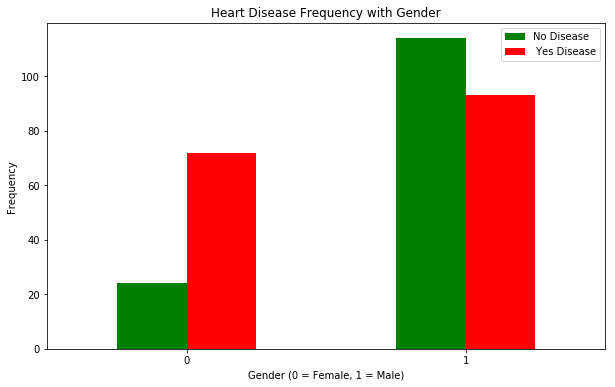

In [40]:
pd.crosstab(df.Gender,df.Target).plot(kind="bar",figsize=(10,6),color=['green', 'red' ])
plt.title('Heart Disease Frequency with Gender')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["No Disease", " Yes Disease"])
plt.ylabel('Frequency')
plt.show()

In [41]:
# ChestPainType , HeartRate, Slope, CardioResult
pd.crosstab(df.Gender,df.Target, margins=True)

Target,0,1,All
Gender,,,
0,24,72,96
1,114,93,207
All,138,165,303


In [42]:
df[(df.ChestPainType==2)& (df.Gender==0)].shape

(35, 14)

In [43]:
df[(df.ChestPainType==2)& (df.Gender==1)].shape

(52, 14)

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3,random_state=4)

In [45]:
print(x.shape)

(303, 13)


In [46]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(212, 13)
(212,)
(91, 13)
(91,)


In [47]:
#KNN
#from sklearn.metrics import confusion_metrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred=knn.predict(x_test)
print("Predicted values are :" , y_pred)
print("Accuracy Score : ", accuracy_score(y_test, y_pred))

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0], dtype=int64)

0.5934065934065934


In [55]:
from sklearn.model_selection import cross_val_score
# Review parameter tunning to increase accuracy using cross_val_score
# 10 fold cross-validation with k=5 for KNN 
knn1=KNeighborsClassifier(n_neighbors=5)
scores= cross_val_score(knn1, x,y, cv=10, scoring='accuracy')
print(scores)

[0.70967742 0.67741935 0.5483871  0.61290323 0.67741935 0.5
 0.83333333 0.63333333 0.5862069  0.75862069]


In [56]:
# calculate average accuracy by changing the sample data with K-fold
print(scores.mean())

0.6537300704486466


In [ ]:
# searching for an optimal value of K for KNN
k_range= range(1,31)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Without creating dummy variable, n-nieghbors=5 and k-fold Accuracy is : 59%
# Without creating dummy variable, n-neighbors=5 with k-fold=10 Accuracy is : 65% --- improved

In [ ]:
After Data Exploration and observation , some categorical variable need to convert into dummy variables.
Scale all the values before applying ML (Machine Learning Model)

USE - get_dummies()- to create dummy columns for categorical variables.
slope, CardioResult,  
Gender, ChestPainType, FBloodSuger, CardioResult, Angina, Slope, NoOfVessels, Thal

In [70]:
dataset=pd.get_dummies(df, columns= ['Gender', 'ChestPainType', 'FBloodSuger', 'CardioResult', 'Angina', 'Slope', 'NoOfVessels', 'Thal'])

In [71]:
dataset.head()

,Age,BloodPressure,Cholesterol,HeartRate,OldPeak,Target,Gender_0,Gender_1,ChestPainType_0,ChestPainType_1,...,Slope_2,NoOfVessels_0,NoOfVessels_1,NoOfVessels_2,NoOfVessels_3,NoOfVessels_4,Thal_0,Thal_1,Thal_2,Thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [76]:
# performing data preprocessing using standard scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
stdScaler= StandardScaler()
columns_to_Scale = ['Age', 'BloodPressure', 'Cholesterol', 'HeartRate', 'OldPeak' ]
dataset[columns_to_Scale] = stdScaler.fit_transform(dataset[columns_to_Scale])

In [77]:
dataset.head()

,Age,BloodPressure,Cholesterol,HeartRate,OldPeak,Target,Gender_0,Gender_1,ChestPainType_0,ChestPainType_1,...,Slope_2,NoOfVessels_0,NoOfVessels_1,NoOfVessels_2,NoOfVessels_3,NoOfVessels_4,Thal_0,Thal_1,Thal_2,Thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [ ]:
y=dataset['Target']
x=dataset.drop(['Target'],axis=1)


In [159]:
from sklearn.model_selection import cross_val_score
Krange=range(1,25)
knn_score =[]

#score1=[]
for k in Krange:
    knn_classifier =KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier, x, y, cv=10, scoring='accuracy')
    score1=score.mean()
    knn_score.append(score1)


print(knn_score)
d=pd.DataFrame(knn_score)
print("\nframe")
print(d)
print("Maximum Accuracy at k: ", d.max())

[0.7482684464219502, 0.7652651093807934, 0.8112940304041528, 0.8046273637374861, 0.8338820912124584, 0.8307563959955505, 0.8374378939562476, 0.8410938079347423, 0.8474378939562477, 0.8474378939562477, 0.8407638116425659, 0.8506637004078605, 0.8338820912124583, 0.8337671486837227, 0.8272080088987763, 0.8372154245457917, 0.8274304783092326, 0.8209788654060068, 0.8242046718576195, 0.8243196143863551, 0.8339970337411939, 0.8242120875046348, 0.8274378939562477, 0.8274378939562478]

frame
           0
0   0.748268
1   0.765265
2   0.811294
3   0.804627
4   0.833882
5   0.830756
6   0.837438
7   0.841094
8   0.847438
9   0.847438
10  0.840764
11  0.850664
12  0.833882
13  0.833767
14  0.827208
15  0.837215
16  0.827430
17  0.820979
18  0.824205
19  0.824320
20  0.833997
21  0.824212
22  0.827438
23  0.827438
Maximum Accuracy at k:  0    0.850664
dtype: float64


In [ ]:
plt.plot(Krange, knn_score)

In [135]:
y=dataset['Target']
x=dataset.drop(['Target'],axis=1)

In [136]:
# we found that the maximum accuracy is at k=12
knn2=KNeighborsClassifier(n_neighbors=12)
scores= cross_val_score(knn2, x,y, cv=10, scoring='accuracy')
print(scores)
print("mean_value is : ", scores.mean())

[0.90322581 0.80645161 0.83870968 0.93548387 0.90322581 0.76666667
 0.9        0.86666667 0.72413793 0.86206897]
mean_value is :  0.8506637004078605


#### Split data after feature selection and data preprocessing

In [137]:

print(x.shape)
print(y.shape)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=4)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(303, 30)
(303,)
(212, 30)
(212,)
(91, 30)
(91,)


In [138]:
knn2.fit(x_train, y_train)
y_pred=knn2.predict(x_test)
print("Predicted values are :" , y_pred)
print("Accuracy Score : ", accuracy_score(y_test, y_pred))

Predicted values are : [0 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1
 1 1 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1
 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 1]
Accuracy Score :  0.8021978021978022


### Random Forest Classifier

In [147]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


In [149]:
rfc= RandomForestClassifier(n_estimators=10)
score =cross_val_score(rfc, x, y, cv=10)

print(score)
print("mean score :", score.mean())

[0.77419355 0.77419355 0.87096774 0.93548387 0.80645161 0.66666667
 0.8        0.8        0.75862069 0.89655172]
mean score : 0.8083129403040414


In [164]:
rfc= RandomForestClassifier(max_depth=3)
score =cross_val_score(rfc, x, y, cv=10)
print(rfc)
print(score)
print(score.mean())


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
[0.80645161 0.83870968 0.87096774 0.90322581 0.90322581 0.83333333
 0.8        0.76666667 0.75862069 0.86206897]
0.8343270300333705


In [167]:
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
print(y_pred)


[0 0 1 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1 1 1 1 1
 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0 1 1
 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0 0 1]


In [168]:
print(accuracy_score(y_test, y_pred))

0.8571428571428571


#### conclusion : Accuracy score on                                   Testing data

    The accuracy score of KNN is:                   0.8021978021978022 
    The accuracy score of Random forest is:         0.8571428571428571

----- END -------